# Lab 11

### Question 1

Carry out the analysis of the stereotypes of youth based on the keywords of their SNS messages by k-means clustering algorithm. Set the seed of random generator to be 2046. Manipulate and transform the data if necessary before the analysis. Interpret the cluster centres.

### Answer:

Load the library for k-mean clustering algorithm

In [1]:
library(stats)

Set seed so that the result is repeatable

In [2]:
set.seed(1024)

Read the dataset from CSV. The data include 30,000 teenagers with four variables indicating personal characteristics and 36 words indicating interests.

In [3]:
teens <- read.csv("snsdata.csv")

Show the structure of the data frame

In [4]:
str(teens) 

'data.frame':	30000 obs. of  40 variables:
 $ gradyear    : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ gender      : Factor w/ 2 levels "F","M": 2 1 2 1 NA 1 1 2 1 1 ...
 $ age         : num  19 18.8 18.3 18.9 19 ...
 $ friends     : int  7 0 69 0 10 142 72 17 52 39 ...
 $ basketball  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ football    : int  0 1 1 0 0 0 0 0 0 0 ...
 $ soccer      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ softball    : int  0 0 0 0 0 0 0 1 0 0 ...
 $ volleyball  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ swimming    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cheerleading: int  0 0 0 0 0 0 0 0 0 0 ...
 $ baseball    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ tennis      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ sports      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cute        : int  0 1 0 1 0 0 0 0 0 1 ...
 $ sex         : int  0 0 0 0 1 1 0 2 0 0 ...
 $ sexy        : int  0 0 0 0 0 0 0 1 0 0 ...
 $ hot         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ kissed      : int  0 0 0 0 5 0 0 0 0 0 ...
 $ dance       : int

Consider only the 36 features for clustering

In [5]:
interests <- teens[,5:40]

Note that the variables are right skewed

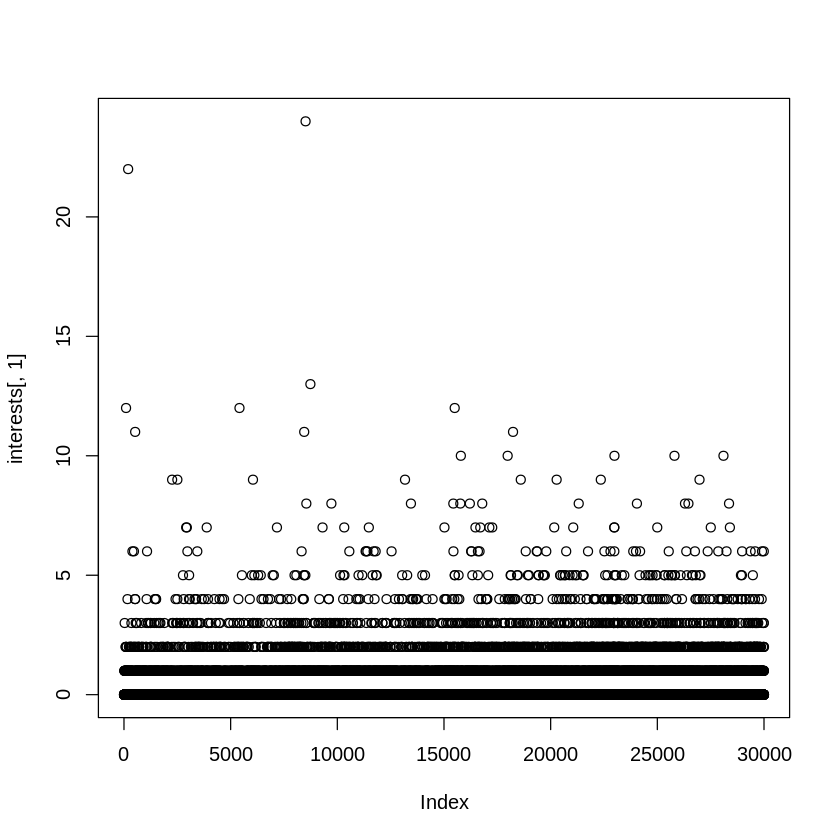

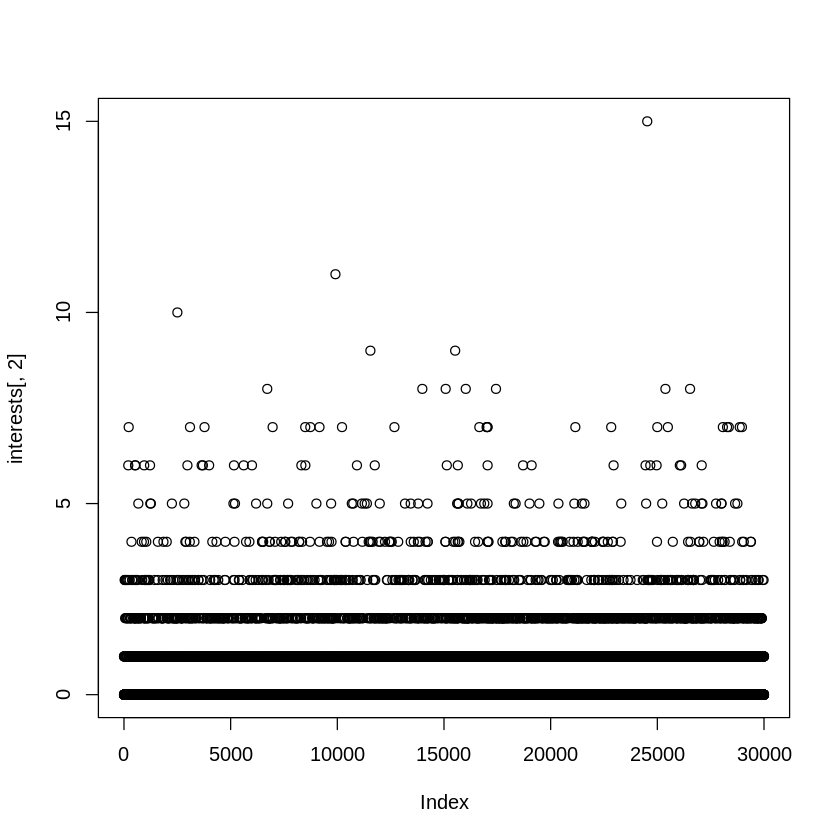

In [6]:
plot(interests[,1])
plot(interests[,2])

Apply square root function to remedy the skewness and z-score to standardise the interests in the data frame

In [7]:
interests_z <- as.data.frame(sqrt(interests))
interests_z <- as.data.frame(scale(interests_z))

Divide teens into five clusters

In [8]:
teen_clusters <- kmeans(interests_z, 5)

Sizes of clusters

In [9]:
teen_clusters$size

[1] 17611  2151  1421  4941  3876

The coordinates of the cluster centroids

In [10]:
teen_clusters$centers

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,⋯,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,-0.27830103,-0.25126095,-0.123418512,-0.20482777,-0.19482887,-0.14928853,-0.13358110,-0.20077711,-0.06799921,-0.22258007,⋯,-0.14260655,-0.22657635,-0.2862746283,-0.21880985,-0.1980605,-0.1816316,-0.12141164,-0.09500798,-0.10708276,-0.13451264
2,-0.01832636,-0.01626445,0.009921541,-0.03795233,-0.03295930,0.01529955,-0.03346914,-0.04684555,0.04130838,-0.05937411,⋯,-0.01223623,-0.08760042,0.0160556119,-0.02665459,-0.1390390,-0.1400403,0.05866591,0.12148758,-0.07881971,-0.04013281
3,0.47497749,0.49245098,0.286113103,0.21391637,0.14005937,0.30639203,0.35182184,0.47165229,0.18695343,0.68820908,⋯,1.32327040,0.69141557,0.2754449318,1.11867684,0.3621190,0.4608525,1.25070573,0.66591110,1.43630163,2.45545874
4,-0.04261473,0.08177506,0.085769290,-0.08898987,0.01644644,0.36617792,0.37175018,-0.10999517,0.06116772,-0.09851381,⋯,0.15103445,0.69186252,0.9344997766,0.51373291,0.7712495,0.6822537,0.10343211,0.11523892,0.05831285,-0.10945719
5,1.15484926,0.86587150,0.341029256,0.98673401,0.83120239,0.09069730,0.02263479,0.90555179,0.13952251,0.91753945,⋯,-0.02292683,-0.05736059,-0.0004447335,-0.05603712,-0.1388540,-0.1356928,-0.07129020,-0.02677745,-0.07062248,-0.12723196


Possibe interpretation:
<ui>
<li> Cluster 1: Brain ?
<li> Cluster 2: Basket Case ?
<li> Cluster 3: Criminal  
<li> Cluster 4: Princess
<li> Cluster 5: Athlete  
</ui>


### Question 2

Carry out the market basket analysis to find out the association rules among the products in a store. Sort the rules according to their importance indicated by lift. 

### Answer:

Load the library for apriori algorithm

In [11]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




Read the data to a sparse matrix

In [12]:
groceries <- read.transactions("groceries.csv", sep = ",")

Show the summary

In [13]:
summary(groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

Show some contents of the sparse matrix

In [14]:
inspect(groceries[1:5, ])

    items                     
[1] {citrus fruit,            
     margarine,               
     ready soups,             
     semi-finished bread}     
[2] {coffee,                  
     tropical fruit,          
     yogurt}                  
[3] {whole milk}              
[4] {cream cheese,            
     meat spreads,            
     pip fruit,               
     yogurt}                  
[5] {condensed milk,          
     long life bakery product,
     other vegetables,        
     whole milk}              


See the proportion of transactions that contain some examples of the items

In [15]:
itemFrequency(groceries[, 1:3])

abrasive cleaner artif. sweetener   baby cosmetics 
    0.0035587189     0.0032536858     0.0006100661

Draw a barchart for those items which have a support at least 0.1

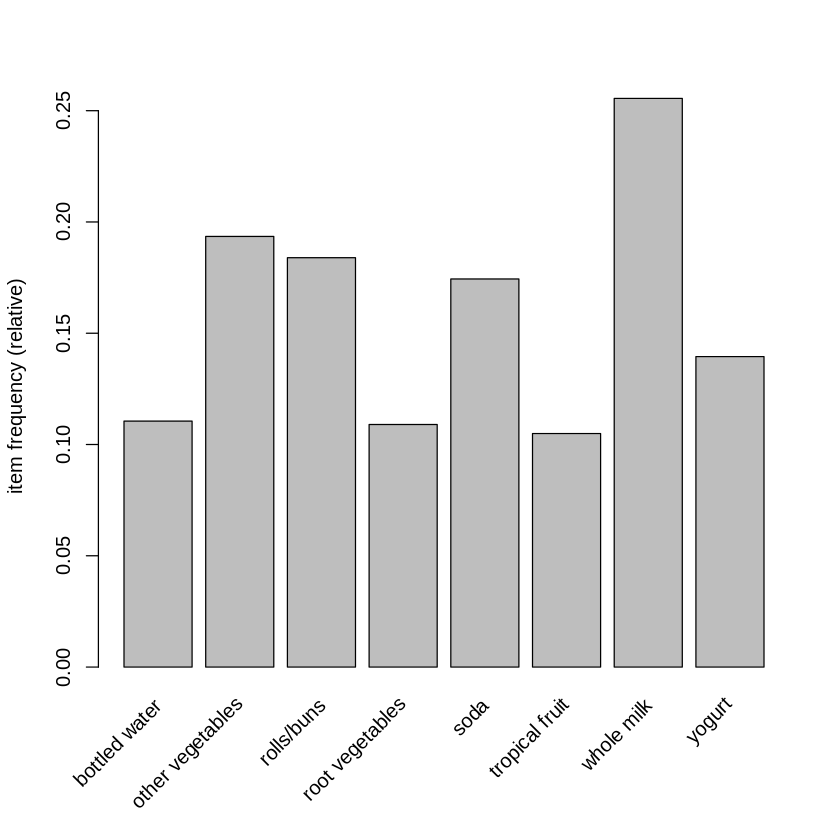

In [16]:
itemFrequencyPlot(groceries, support = 0.1)

Draw a barchart for the 20 items with highest item frequency

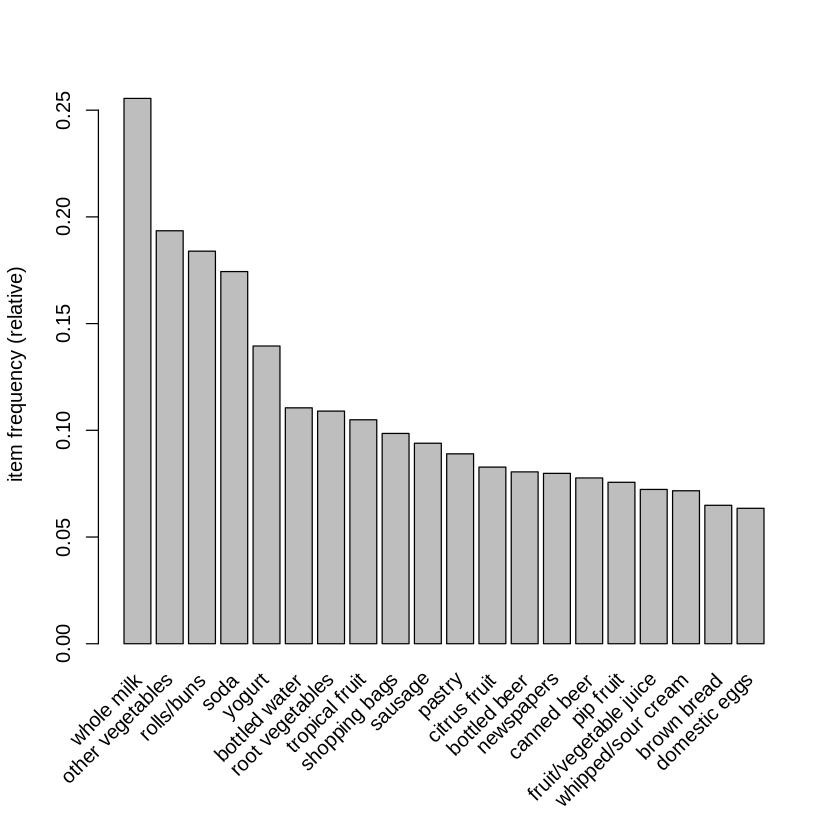

In [17]:
itemFrequencyPlot(groceries, topN = 20)

The 1st trial to apply Apriori algorithm to find the association rules

In [18]:
apriori(groceries)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

The 2nd trial to apply Apriori algorithm with more conditions to find the association rules

In [19]:
groceryrules <- apriori(groceries, parameter = list(support = 0.006, confidence = 0.25, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Evaluate model performance

In [20]:
summary(groceryrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.009964   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:0.018709   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :0.024809   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :0.032608   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:0.035892   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :0.255516   Max.   :3.9565  
     count      
 Min.   : 60.0  
 1st Qu.: 70.0  
 Median : 86.0  
 Mean   :113.5  
 3rd Qu.:121.0  
 Max.   :736.0  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25

Show the first three rules

In [21]:
inspect(groceryrules[1:3,])

    lhs             rhs               support     confidence coverage  
[1] {pot plants} => {whole milk}      0.006914082 0.4000000  0.01728521
[2] {pasta}      => {whole milk}      0.006100661 0.4054054  0.01504830
[3] {herbs}      => {root vegetables} 0.007015760 0.4312500  0.01626843
    lift     count
[1] 1.565460 68   
[2] 1.586614 60   
[3] 3.956477 69   


Show the best five rules according to the lift statistic

In [22]:
inspect(sort(groceryrules, by = "lift")[1:5,])

    lhs                   rhs                      support confidence   coverage     lift count
[1] {herbs}            => {root vegetables}    0.007015760  0.4312500 0.01626843 3.956477    69
[2] {berries}          => {whipped/sour cream} 0.009049314  0.2721713 0.03324860 3.796886    89
[3] {other vegetables,                                                                         
     tropical fruit,                                                                           
     whole milk}       => {root vegetables}    0.007015760  0.4107143 0.01708185 3.768074    69
[4] {beef,                                                                                     
     other vegetables} => {root vegetables}    0.007930859  0.4020619 0.01972547 3.688692    78
[5] {other vegetables,                                                                         
     tropical fruit}   => {pip fruit}          0.009456024  0.2634561 0.03589222 3.482649    93


Save the association rules to a CSV file

In [23]:
write(groceryrules, file = "groceryrules.csv",
      sep = ",", quote = TRUE, row.names = FALSE)

## 